In [6]:
from coop import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

In [7]:
width = 50
height = 50
grid = createRectangleGrid(width, height)

#### simulation set up
agentList = []
popSize = 100
for i in range(popSize):
    rx = np.random.randint(0, width)
    ry = np.random.randint(0, height)
    while(grid[rx][ry].agentHere != None):
        rx = np.random.randint(0, width)
        ry = np.random.randint(0, height)
    a = Agent(rx, ry, 2)
    grid[rx][ry].agentHere = a
    a.nodeAt = grid[rx][ry]
    a.randomizeBrain()
    agentList.append(a)

resources = []
count = 0.0

In [8]:
def init():
    im.set_data(data)
    return im

def animate(i):

    data = np.zeros((width, height))

    count = 0.0
    resources.append(0.0)
    for x in range(width):
        for y in range(height):
            if(i == 0):
                grid[x][y].resources += 1.0
            count += 1
            resources[-1] += grid[x][y].resources

    agentsToBirth = []
    agentsToKill = []
    for a in agentList:
        data[a.x, a.y] = 1.0 + a.resources
        a.calcSenseVector()
        a.calcAction()
        offspring = a.takeAction()
        if(offspring != None):
            agentsToBirth.append(offspring)
        if(a.resources <= 0.0000001):
            agentsToKill.append(a)
    for a in agentsToKill:
        agentList.remove(a)
    for a in agentsToBirth:
        agentList.append(a)

    im.set_data(data)

    return im

AttributeError: 'function' object has no attribute 'to_html5_video'

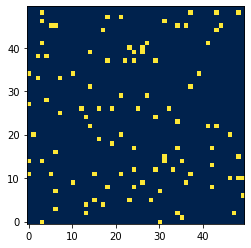

In [11]:
#### Run the sim and animate live
data = np.zeros((width, height))
for a in agentList:
    data[a.x, a.y] = a.resources

fig, ax = plt.subplots()
ax.set_xlim((-0.5, width-0.5))
ax.set_ylim((-0.5, height-0.5))
im = ax.imshow(data, cmap="cividis")

anim = animation.FuncAnimation(fig, animate, init_func=init, blit=False, interval=1000/60)
HTML(animat.to_html5_video())
#plt.show()


# plt.figure()
# plt.plot(resources)
# plt.show()